In [1]:
# visual confirmation of ICs
# get 30 ICs 
import nipype.interfaces.io as nio
import os
PD_ICA_file='/templateflow/PD_ICAs';
ICs_list=list(range(30))
ICs_list=["{:0>4d}".format(x) for x in ICs_list]
# file import
ds_ic = nio.DataGrabber(infields=['IC_id'])
ds_ic.inputs.base_directory = PD_ICA_file # database
ds_ic.inputs.template = 'melodic_IC_%4s.nii.gz' # from cwd
ds_ic.inputs.sort_filelist = True
ds_ic.inputs.IC_id = ICs_list
res_ic = ds_ic.run()
ic_list=res_ic.outputs.outfiles
atlas_09_masked='/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz'
GROUPS=['PD','ET','NC']
OUT_DIR='/output/PD_ICA/'
SUB_LIST=[]; AGE_LIST=[]; JCOB_LIST=[];

for group_name in GROUPS:
    current_group=group_name
    current_sub_list_file = '/codes/devel/PD_Marker/'+current_group+'_info_ICA.list'
    # create dir for output
    current_OUT_DIR=OUT_DIR+current_group+'/'
    if not os.path.exists(current_OUT_DIR):
        os.makedirs(current_OUT_DIR)
    #read sub list
    with open(current_sub_list_file, 'r') as f_sub:
        sub_list_raw= f_sub.readlines()
    sub_list = [x[0:-1].split('\t')[0] for x in sub_list_raw] # remove 
    age_list = [int(x[0:-1].split('\t')[1]) for x in sub_list_raw]
    SUB_LIST.append(sub_list);  AGE_LIST.append(age_list);
    N_sub=len(sub_list)
    print(group_name, ': ', N_sub, sub_list, age_list)
    # grab group Jacobians
    ds_jacobian = nio.DataGrabber(infields=['sub_id'])
    ds_jacobian.inputs.base_directory = current_OUT_DIR # database
    ds_jacobian.inputs.template = '%s_desc-preproc_T1w_space-MNI2009c_Warp_Jacobian.nii.gz' # from cwd
    ds_jacobian.inputs.sort_filelist = True
    ds_jacobian.inputs.sub_id = sub_list
    res_jacobian = ds_jacobian.run()
    jacobian_list=res_jacobian.outputs.outfiles
    JCOB_LIST.append(jacobian_list)
pd_sub_list = SUB_LIST[0]; et_sub_list = SUB_LIST[1]; nc_sub_list = SUB_LIST[2]; 
pd_age_list = AGE_LIST[0]; et_age_list = AGE_LIST[1]; nc_age_list = AGE_LIST[2];
pd_jaco_list=JCOB_LIST[0]; et_jaco_list=JCOB_LIST[1]; nc_jaco_list=JCOB_LIST[2];

PD :  40 ['sub-0002', 'sub-0004', 'sub-0005', 'sub-0006', 'sub-0008', 'sub-0009', 'sub-0012', 'sub-0014', 'sub-0015', 'sub-0021', 'sub-0022', 'sub-0023', 'sub-0024', 'sub-0025', 'sub-0028', 'sub-0030', 'sub-0031', 'sub-0034', 'sub-0035', 'sub-0037', 'sub-0038', 'sub-0040', 'sub-0047', 'sub-0051', 'sub-0052', 'sub-0068', 'sub-0075', 'sub-0076', 'sub-0094', 'sub-0096', 'sub-0098', 'sub-0109', 'sub-0111', 'sub-0118', 'sub-0125', 'sub-0129', 'sub-0132', 'sub-0136', 'sub-1000', 'sub-1020'] [70, 76, 45, 63, 59, 57, 47, 66, 65, 53, 62, 50, 63, 44, 61, 72, 51, 70, 69, 68, 54, 63, 75, 54, 56, 66, 66, 48, 66, 73, 57, 69, 69, 54, 60, 69, 74, 62, 77, 6]
ET :  30 ['sub-0016', 'sub-0061', 'sub-0081', 'sub-0115', 'sub-0119', 'sub-0122', 'sub-0134', 'sub-0178', 'sub-1012', 'sub-1120', 'sub-1160', 'sub-1230', 'sub-1310', 'sub-1340', 'sub-1450', 'sub-1500', 'sub-1690', 'sub-1890', 'sub-1920', 'sub-2400', 'sub-3600', 'sub-3700', 'sub-3900', 'sub-4200', 'sub-4300', 'sub-4700', 'sub-5700', 'sub-7000', 'sub


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


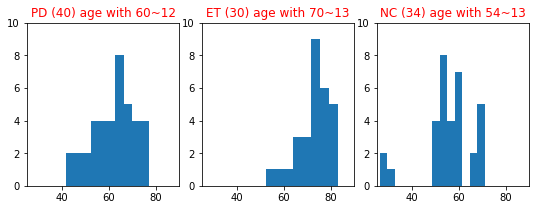

In [2]:
# plot group age distribution
import matplotlib.pyplot as plt
import numpy as np
N_BINs=20; X_LIM=[25, 90]; Y_LIM=[0, 10];
fig, ax = plt.subplots(1,3, figsize=[9, 3])
ax[0].hist(AGE_LIST[0], bins=N_BINs)
ax[0].set_ylim(Y_LIM)
ax[0].set_xlim(X_LIM)
ax[0].set_title('PD ('+str(len(AGE_LIST[0]))+') age with '+str(int(np.mean(AGE_LIST[0])))+'~'+str(int(np.std(AGE_LIST[0]))), color='r')

ax[1].hist(AGE_LIST[1], bins=N_BINs)
ax[1].set_ylim(Y_LIM)
ax[1].set_xlim(X_LIM)
ax[1].set_title('ET ('+str(len(AGE_LIST[1]))+') age with '+str(int(np.mean(AGE_LIST[1])))+'~'+str(int(np.std(AGE_LIST[1]))), color='r')

ax[2].hist(AGE_LIST[2], bins=N_BINs)
ax[2].set_ylim(Y_LIM)
ax[2].set_xlim(X_LIM)
ax[2].set_title('NC ('+str(len(AGE_LIST[2]))+') age with '+str(int(np.mean(AGE_LIST[2])))+'~'+str(int(np.std(AGE_LIST[2]))), color='r')
fig.subplots_adjust(wspace=0.15, hspace=0)
plt.show()

In [3]:
# plot and sv Dagher 30 ICs
from nilearn import plotting
GROUPS=['PD','ET','NC']
OUT_DIR='/output/PD_ICA/pics'
atlas_09_masked='/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz'
N_ic = len(ic_list)
i_ic=0
#for i_ic in range(N_ic):
#plotting.plot_anat(ic_list[i_ic], title="IC "+str(i_ic), )
VMIN= 3; VMAX=16; # vmin=VMIN;
#plotting.plot_glass_brain(ic_list[i_ic], title='no th '+str(i_ic)+', with TH=0', display_mode='lyrz',
#                          black_bg=True, colorbar=True, plot_abs=False, vmin=VMIN, vmax=VMAX, threshold=5)
for i_ic in range(N_ic):
    plotting.plot_stat_map(ic_list[i_ic], bg_img=atlas_09_masked, display_mode='z', threshold=3, vmax=VMAX, \
                           title="IC "+str(i_ic), draw_cross=False, cut_coords=[-16, -12, -7, -2,  8, 14, 20, 70], \
                           output_file=OUT_DIR+'/IC-'+str(i_ic)+'.png')


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [8]:
# plot local ICs and sv 19 ICs
from nilearn import plotting
GROUPS=['PD','ET','NC']
LOCAL_IC_DIR='/output/PD_ICA/ICA_local/stats/'
prob_file=list(range(20)); thz_file=list(range(20));
prob_file=[ LOCAL_IC_DIR+'probmap_'+str(x)+'.nii.gz' for x in prob_file[1:]]
thz_file =[ LOCAL_IC_DIR+'thresh_zstat'+str(x)+'.nii.gz' for x in thz_file[1:]]

OUT_DIR='/output/PD_ICA/pics_local-ICA'
atlas_09_masked='/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz'
N_ic = len(thz_file)
i_ic=0
#for i_ic in range(N_ic):
#plotting.plot_anat(ic_list[i_ic], title="IC "+str(i_ic), )
VMIN= 3; VMAX=16; # vmin=VMIN;
#plotting.plot_glass_brain(ic_list[i_ic], title='no th '+str(i_ic)+', with TH=0', display_mode='lyrz',
#                          black_bg=True, colorbar=True, plot_abs=False, vmin=VMIN, vmax=VMAX, threshold=5)
for i_ic in range(N_ic):
    plotting.plot_stat_map(thz_file[i_ic], bg_img=atlas_09_masked, display_mode='z', threshold=3, vmax=VMAX, \
                           title="loocal-IC "+str(i_ic), draw_cross=False, cut_coords=[-16, -12, -7, -2,  8, 14, 20, 70], \
                           output_file=OUT_DIR+'/local_IC-'+str(i_ic)+'.png')


In [ ]:
# show PD-ICA (IC7) distribution 
atlas_09_masked='/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_T1w.nii.gz'
import nibabel as nib
tmp_img=nib.load(atlas_09_masked);
def plot_ic_distr(ic_img, pd_img, et_img, nc_img, template):
    import nibabel as nib
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    from nilearn.image import resample_to_img
    ic_img_re = ic_img
    pd_img_re = resample_to_img(pd_img, ic_img)
    et_img_re = resample_to_img(et_img, ic_img)
    nc_img_re = resample_to_img(nc_img, ic_img)
    data  = ic_img_re.get_fdata()
    data1 = pd_img_re.get_fdata()
    data2 = et_img_re.get_fdata()
    data3 = nc_img_re.get_fdata()
    nz_pos=np.flatnonzero(data)
    IC_val=list(data.ravel()[nz_pos])
    pd_val=list(stats.zscore(data1.ravel()[nz_pos]))
    et_val=list(stats.zscore(data2.ravel()[nz_pos]))
    nc_val=list(stats.zscore(data3.ravel()[nz_pos]))
    YLIM=[0, 3000]; N_BINs=500; XLIM=[-10,10]
    fig, ax = plt.subplots(2,2, figsize=[9, 9])
    ax[0,0].hist(IC_val, bins=N_BINs)
    ax[0,0].set_ylim(YLIM)
    ax[0,0].set_xlim(XLIM)
    ax[0,0].set_title('PD-ICA Intensity (0s removed)', color='r')

    ax[0,1].hist(pd_val, bins=N_BINs)
    ax[0,1].set_ylim(YLIM)
    ax[0,1].set_xlim(XLIM)
    ax[0,1].set_title('PD sub Intensity (z-score)', color='r')

    ax[1,0].hist(et_val, bins=N_BINs)
    ax[1,0].set_ylim(YLIM)
    ax[1,0].set_xlim(XLIM)
    ax[1,0].set_title('ET sub Intensity (z-score)', color='r')
    
    ax[1,1].hist(nc_val, bins=N_BINs)
    ax[1,1].set_ylim(YLIM)
    ax[1,1].set_xlim(XLIM)
    ax[1,1].set_title('NC sub Intensity (z-score)', color='r')
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()
#
import nibabel as nib
i_PD_IC=7; i_pd=0; i_et=0; i_nc=0;
plot_ic_distr(nib.load(ic_list[i_PD_IC]), nib.load(pd_jaco_list[i_pd]), \
              nib.load(et_jaco_list[i_et]), nib.load(nc_jaco_list[i_nc]), tmp_img)

In [ ]:
# sub X IC
#cross product prediction
#%%time
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn.image import resample_to_img
from nilearn.image import math_img

def plt_xIC(ic_img, pd_img, nc_img, TH, i_IC): 
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    import nibabel as nib
    from nilearn.image import resample_to_img
    from nilearn import plotting

    resampled_data1_img = resample_to_img(pd_img, ic_img)
    resampled_data2_img = resample_to_img(nc_img, ic_img)
    result_img1 = math_img("img1 * img2", img1=ic_img, img2=resampled_data1_img)
    result_img2 = math_img("img1 * img2", img1=ic_img, img2=resampled_data2_img)
    plotting.plot_glass_brain(ic_img, title='IC'+str(i_IC), display_mode='lyrz',
                              black_bg=True, colorbar=True, plot_abs=False,threshold=TH)
    plotting.plot_glass_brain(result_img1, title='PDxIC'+str(i_IC), display_mode='lyrz',
                              black_bg=True, colorbar=True, plot_abs=False,threshold=TH)
    plotting.plot_glass_brain(result_img2, title='NCxIC'+str(i_IC), display_mode='lyrz',
                              black_bg=True, colorbar=True, plot_abs=False,threshold=TH)
    return result_img1, result_img2

i_IC=7; i_sub=0; TH=3
ic_img = nib.load(ic_list[i_IC]);   
pd_img = nib.load(pd_jaco_list[i_sub]); 
nc_img = nib.load(nc_jaco_list[i_sub]);
#resampled_data1_img = resample_to_img(pd_img, ic_img)
#resampled_data2_img = resample_to_img(nc_img, ic_img)
plt_xIC(ic_img, pd_img, nc_img, TH, i_IC)